In [2]:


import cifar10
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn import neural_network
from sklearn.neural_network import MLPClassifier





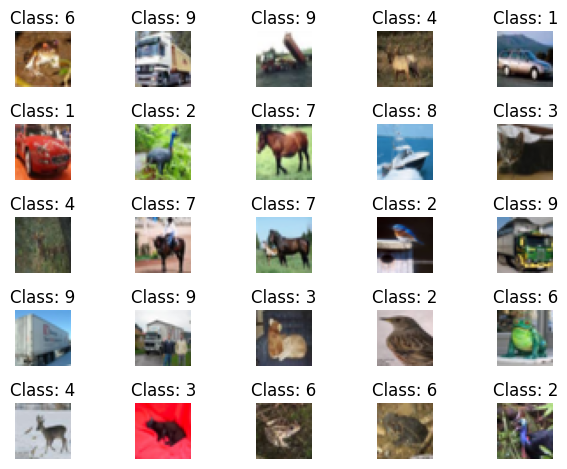

In [3]:
batch_gen = cifar10.data_batch_generator()
images = []
labels = []
cols = 5
rows = 5
data_generator = cifar10.test_batch_generator()
for i, (data, label) in enumerate(data_generator):
#   if i == cols*rows:
#     break
  images.append(data)
  labels.append(label)

fig, axs = plt.subplots(cols, rows)

# Plot the first 10 images
for i in range(cols):
  for j in range(rows):
    index = i * cols + j
    axs[i, j].imshow(images[index])
    axs[i, j].set_title(f"Class: {labels[index]}")
    axs[i, j].axis('off')  # Hide axes for cleaner visualization

# Make the plot visible
plt.tight_layout()
plt.show()


In [4]:
import tensorflow as tf

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# print(y_train.dtype)
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0





In [5]:
xtrain1 = x_train.reshape(x_train.shape[0], -1)
xtest1 = x_test.reshape(x_test.shape[0], -1)
ytrain1 = y_train.flatten()
ytest1 = y_test.flatten()

# Print the shapes to verify
print("xtrain1 shape:", xtrain1.shape)
print("xtest1 shape:", xtest1.shape)


xtrain1 shape: (50000, 3072)
xtest1 shape: (10000, 3072)


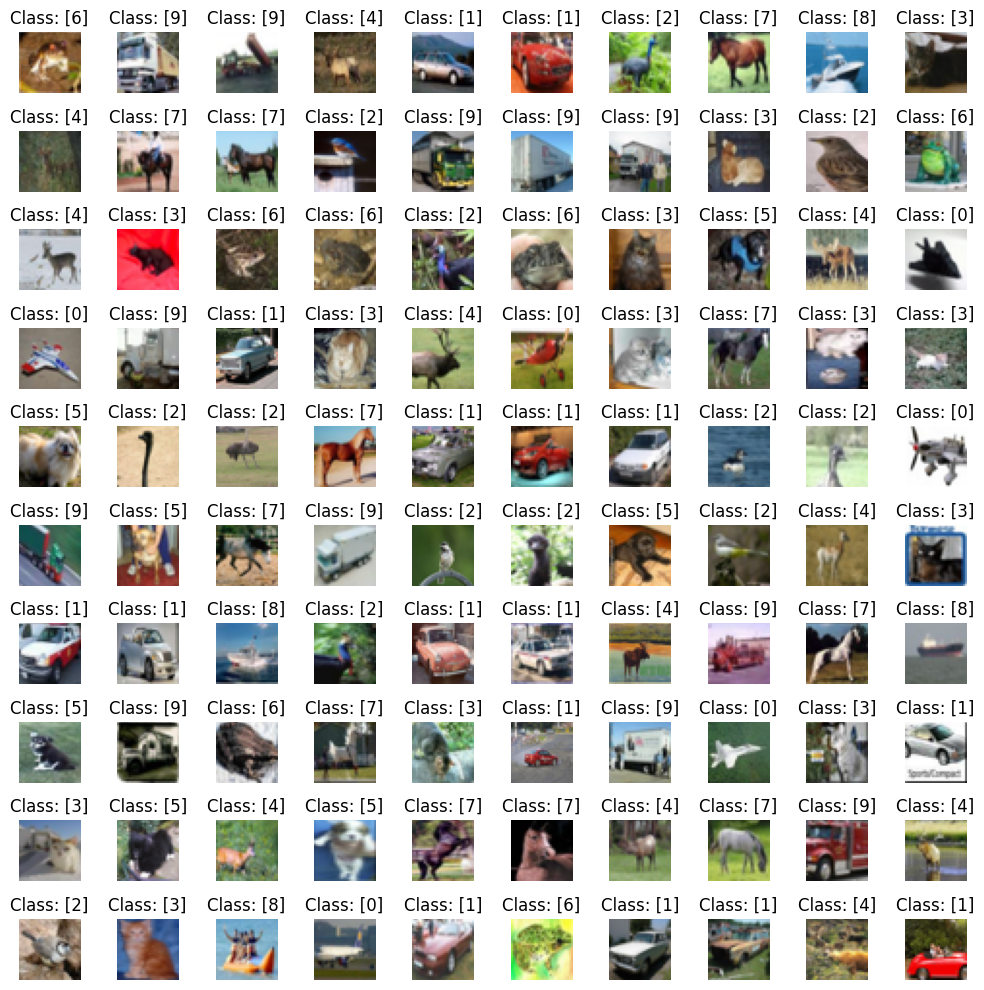

In [6]:
def show_images(images, labels, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr])
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()
    


show_images(x_train, y_train, 100)

In [6]:
from sklearn.neural_network import MLPClassifier as MLPClassifier

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=100, activation='logistic', verbose=True , max_iter = 1000)

In [8]:
mlp.fit(X=xtrain1, y=ytrain1)
# x = mlp.score(x_test, y_test)
# print(x)


Iteration 1, loss = 1.94071210
Iteration 2, loss = 1.77138726
Iteration 3, loss = 1.69850696
Iteration 4, loss = 1.64938360
Iteration 5, loss = 1.60676546
Iteration 6, loss = 1.57168222
Iteration 7, loss = 1.54580711
Iteration 8, loss = 1.52086975
Iteration 9, loss = 1.50133886
Iteration 10, loss = 1.47927507
Iteration 11, loss = 1.46183497
Iteration 12, loss = 1.44252193
Iteration 13, loss = 1.43004765
Iteration 14, loss = 1.41181772
Iteration 15, loss = 1.40144080
Iteration 16, loss = 1.38256047
Iteration 17, loss = 1.36930273
Iteration 18, loss = 1.35864474
Iteration 19, loss = 1.34495744
Iteration 20, loss = 1.33717480
Iteration 21, loss = 1.32564709
Iteration 22, loss = 1.31830851
Iteration 23, loss = 1.30827657
Iteration 24, loss = 1.29790786
Iteration 25, loss = 1.28420143
Iteration 26, loss = 1.28160348
Iteration 27, loss = 1.26388239
Iteration 28, loss = 1.26250156
Iteration 29, loss = 1.25394480
Iteration 30, loss = 1.24208224
Iteration 31, loss = 1.23350574
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=1000,
              verbose=True)

In [9]:
from sklearn.metrics import accuracy_score
ypred1 = mlp.predict(xtrain1)

# Evaluate the classifier
accuracy = accuracy_score(ypred1, ytrain1)

ypred2 = mlp.predict(xtest1)
accuracy2 = accuracy_score(ypred2, ytest1)

In [10]:
print(accuracy)
print(accuracy2)

0.93592
0.4359


Number of neurons: 50, Test set accuracy: 43.74%
Number of neurons: 100, Test set accuracy: 44.76%
Number of neurons: 150, Test set accuracy: 46.76%
Number of neurons: 200, Test set accuracy: 47.28%
Number of neurons: 250, Test set accuracy: 47.42%


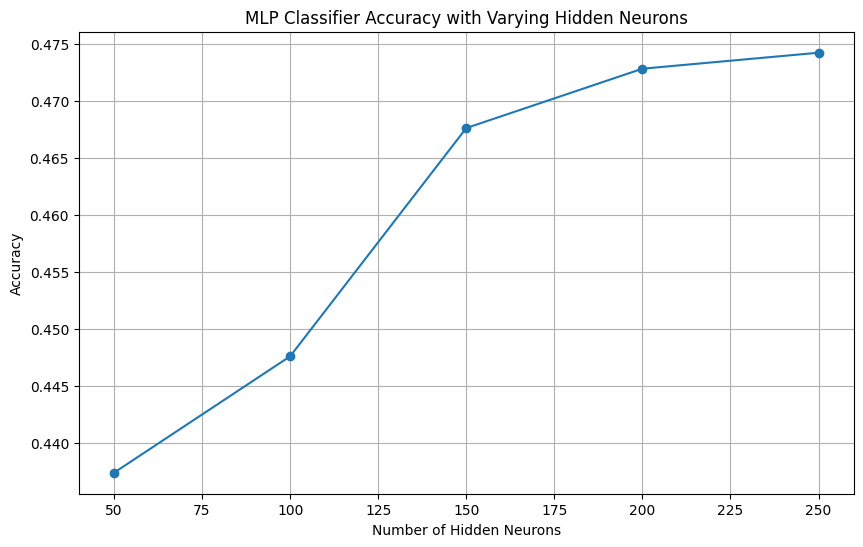

In [11]:
neuron_range = [50, 100, 150, 200, 250]
accuracy_scores = []

for neurons in neuron_range:
    # Train an MLP classifier with varying hidden neurons
    mlp = MLPClassifier(hidden_layer_sizes=neurons, activation='logistic', verbose=False , max_iter = 1000)
    
    mlp.fit(xtrain1, ytrain1)

    # Predict on the test data
    y_pred = mlp.predict(xtest1)

    # Evaluate the classifier
    accuracy = accuracy_score(ytest1, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Number of neurons: {neurons}, Test set accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(neuron_range, accuracy_scores, marker='o')
plt.title('MLP Classifier Accuracy with Varying Hidden Neurons')
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

So what did we learn? This shit fucking sucked omg. And it killed my fucking laptop too. But it's likely that there's just too many neurons that it trained on and for sake of not owning 100000 gpus i should run it on a smaller data set to tinker more with this stuff. Additionally, this data should be run through a black and white dataset to compare.  

In [12]:
def select_best (accuracy_scores, neurons) : 
    max_idx = 0; 
    max_score = 0; 
    for idx, score in enumerate(accuracy_scores): 
        if score > max_score: 
            max_score = score; 
            max_idx = idx; 


    return neurons[max_idx]

best_neuron_sample = select_best(accuracy_scores, neurons=neuron_range)

In [13]:
activation_functions = ['identity', 'logistic', 'tanh', 'relu']
for activation in activation_functions:
    # Train an MLP classifier with varying activation functions
    mlp = MLPClassifier(hidden_layer_sizes=best_neuron_sample, activation='logistic', verbose=False , max_iter = 1000)
    
    mlp.fit(xtrain1, y_train)

    # Predict on the test data
    y_pred = mlp.predict(xtest1)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Activation: {activation}, Test set accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(activation_functions, accuracy_scores, color='blue')
plt.title('MLP Classifier Accuracy with Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Activation: identity, Test set accuracy: 51.10%


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


So what do we find out 


In [7]:
from skimage.color import rgb2gray

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train_gray = np.array([rgb2gray(img) for img in x_train])
x_test_gray = np.array([rgb2gray(img) for img in x_test])

x_train_gray = x_train_gray.astype('float32') / 255.0
x_test_gray = x_test_gray.astype('float32') / 255.0

xtrain_gray_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)
xtest_gray_flat = x_test_gray.reshape(x_test_gray.shape[0], -1)

# y_train = y_train.flatten()
# y_test = y_test.flatten()

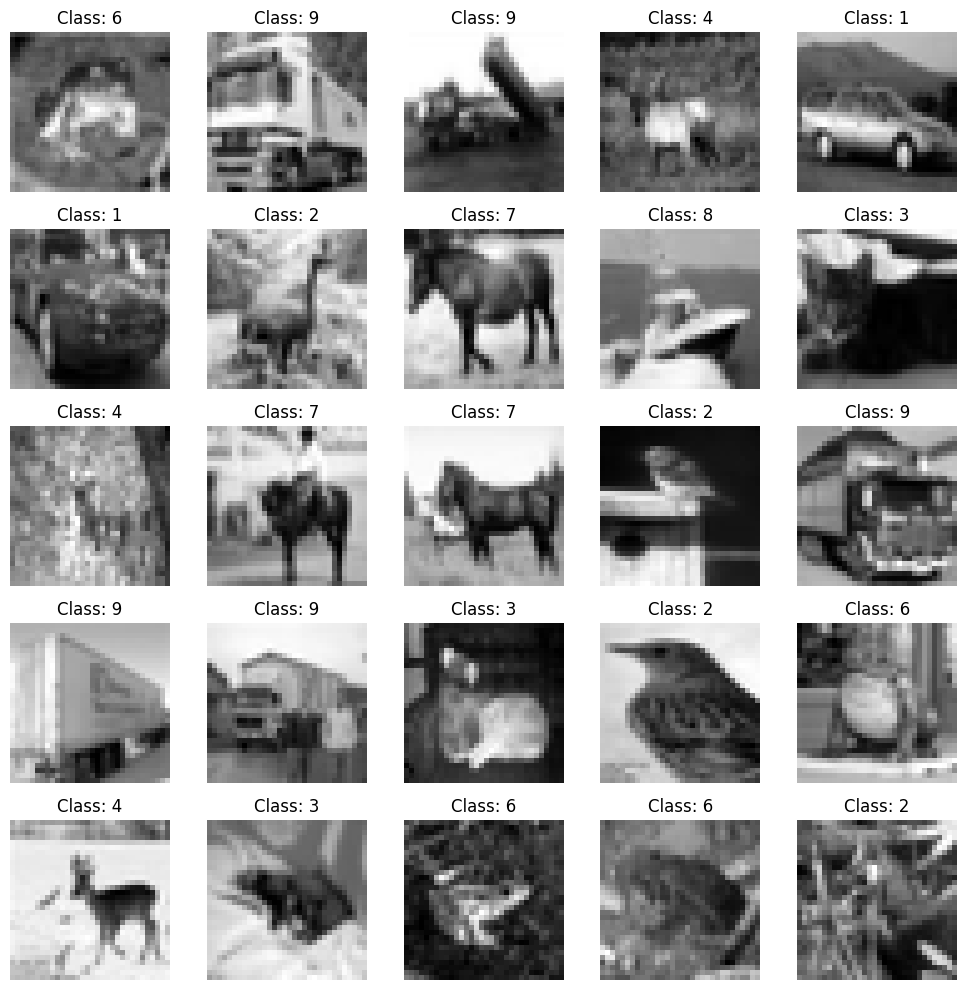

In [10]:
def show_images_blk_white(images, labels, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            axes[i,j].set_title(f'Class: {labels[img_ctr]}')
            # axes[i]

            
            axes[i,j].imshow(images[img_ctr], cmap = 'gray')
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()
show_images_blk_white(x_train_gray, ytrain1)

I mentioned earlier I don't have the funds to afford 10000 of the top end GPUs so let's run this on a smaller data set and see what happens. I might leave some big shit to run overnight, but honestly it looks like such trash that I'm not sure its even worth it. 



In [23]:
generic_seed = 1234
def select_percentage_of_data(x, y, percentage, seed = generic_seed):
    """Select a percentage of the data for training."""
    np.random.seed(seed)  # For reproducibility
    num_samples = int(len(x) * (percentage / 100.0))
    indices = np.random.choice(len(x), num_samples, replace=False)
    return x[indices], y[indices]


In [21]:

percent_selected = 10

xtrain_gray_flat_small, ytrain_small_gray = select_percentage_of_data(xtrain_gray_flat, ytrain1, percent_selected); 
print(xtrain_gray_flat_small.shape)
print(ytrain_small_gray.shape)
xtrain_color_small, ytrain_small_color = select_percentage_of_data(xtrain1, ytrain1, percent_selected);
 

(5000, 1024)
(5000,)


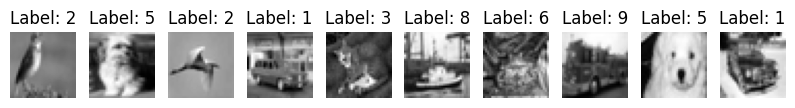

In [33]:
# show_images_blk_white(xtrain_gray_flat_small, ytrain_small_gray)

def show_images_from_random_choice(images, labels, num_images=10):
    """Display a grid of images."""
    np.random.seed(generic_seed)
    plt.figure(figsize=(num_images, num_images))
    indices = np.random.choice(len(images), num_images, replace=False)
    for i, index in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index], cmap='gray')
        plt.title(f"Label: {labels[index]}")
        plt.axis('off')
    plt.show()

show_images_from_random_choice(x_train_gray, ytrain1)

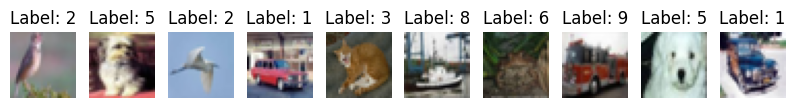

In [34]:
# show_images(xtrain_color_small, ytrain_small_color)
show_images_from_random_choice(x_train, ytrain1)

In [54]:
mlp_50 = MLPClassifier(hidden_layer_sizes=300, activation='', solver='adam', max_iter=1000, verbose=True)

mlp_50.fit(xtrain_gray_flat_small, ytrain_small_gray)

Iteration 1, loss = 2.30063148
Iteration 2, loss = 2.29168942
Iteration 3, loss = 2.28185928
Iteration 4, loss = 2.26801540
Iteration 5, loss = 2.24838343
Iteration 6, loss = 2.22676974
Iteration 7, loss = 2.20560031
Iteration 8, loss = 2.18572591
Iteration 9, loss = 2.16885735
Iteration 10, loss = 2.15586232
Iteration 11, loss = 2.14476325
Iteration 12, loss = 2.13481025
Iteration 13, loss = 2.12718040
Iteration 14, loss = 2.11860925
Iteration 15, loss = 2.11044879
Iteration 16, loss = 2.10717308
Iteration 17, loss = 2.09917710
Iteration 18, loss = 2.09402424
Iteration 19, loss = 2.08752314
Iteration 20, loss = 2.08322425
Iteration 21, loss = 2.07942520
Iteration 22, loss = 2.07419160
Iteration 23, loss = 2.07149013
Iteration 24, loss = 2.06739784
Iteration 25, loss = 2.06454310
Iteration 26, loss = 2.06175830
Iteration 27, loss = 2.05844715
Iteration 28, loss = 2.05520932
Iteration 29, loss = 2.05313011
Iteration 30, loss = 2.04952003
Iteration 31, loss = 2.04709618
Iteration 32, los

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=300, max_iter=1000, verbose=True)

In [55]:
from sklearn.metrics import accuracy_score
_50_gray_flat_pred_test = mlp_50.predict(xtest_gray_flat)
accuracy = accuracy_score(ytest1, _50_gray_flat_pred_test)

_50_gray_flat_train_test = mlp_50.predict(xtrain_gray_flat_small);
accuracy_train = accuracy_score(ytrain_small_gray, _50_gray_flat_train_test)
print(f'Test accuracy: {accuracy}\tTrain accuracy {accuracy}')


Test accuracy: 0.336	Train accuracy 0.336


In [56]:
def cool_shit( xtrain, ytrain, xtest, ytest, neuron_range = [50, 100, 150, 200, 250], max_iter = 1000, activation = 'relu', solver='adam'): 


    accuracy_scores = []

    for neurons in neuron_range:
        # Train an MLP classifier with varying hidden neurons
        mlp = MLPClassifier(hidden_layer_sizes=neurons, activation=activation, verbose=False , max_iter = max_iter, solver=solver)
        
        mlp.fit(xtrain, ytrain)

        # Predict on the test data
        y_pred = mlp.predict(xtest)

        # Evaluate the classifier
        accuracy = accuracy_score(ytest, y_pred)
        accuracy_scores.append(accuracy)
        print(f"Number of neurons: {neurons}, Test set accuracy: {accuracy * 100:.2f}%")

    # Plot the accuracy scores
    plt.figure(figsize=(10, 6))
    plt.plot(neuron_range, accuracy_scores, marker='o')
    plt.title('MLP Classifier Accuracy with Varying Hidden Neurons')
    plt.xlabel('Number of Hidden Neurons')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()



/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Number of neurons: 50, Test set accuracy: 25.24%
Number of neurons: 100, Test set accuracy: 27.71%
Number of neurons: 150, Test set accuracy: 27.25%
Number of neurons: 200, Test set accuracy: 27.76%
Number of neurons: 250, Test set accuracy: 25.65%


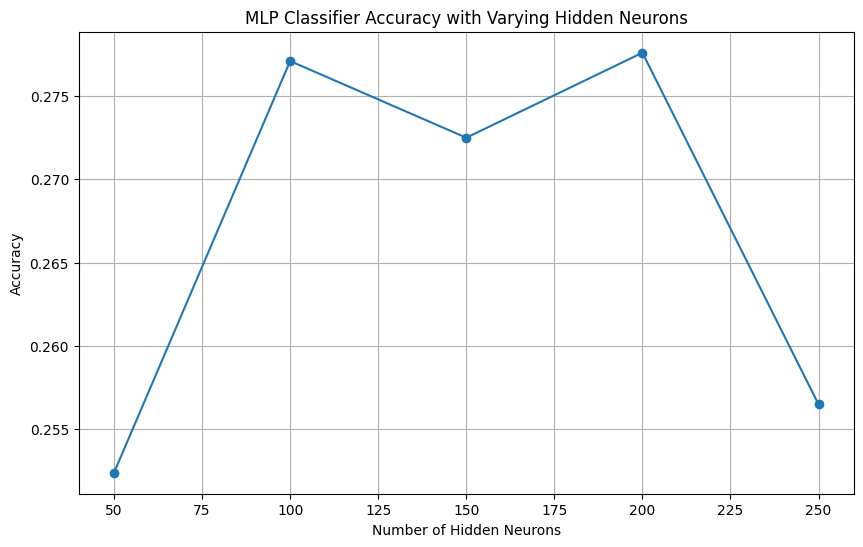

In [57]:
neuron_range = [50, 100, 200, 400, 800] # look ma i can use big numbers cuz i'm running this on small images (:

max_iterations = 2500

activations = ['relu', 'identity', 'logistic', 'tanh']
solvers = ['adam', 'sgd', 'lbfgs']

cool_shit(xtrain_gray_flat_small, ytrain_small_gray, xtest_gray_flat, y_test)




In [69]:
# for solver in solvers : 
#     cool_shit(xtrain=xtrain_gray_flat, ytrain=ytrain_small_gray)


mlp_50 = MLPClassifier(hidden_layer_sizes=300, activation='relu', solver='adam', max_iter=1000, verbose=True, n_iter_no_change=20)

mlp_50.fit(xtrain_color_small, ytrain_small_color)





Iteration 1, loss = 2.81867360
Iteration 2, loss = 2.03122315
Iteration 3, loss = 1.93291276
Iteration 4, loss = 1.88171168
Iteration 5, loss = 1.83970119
Iteration 6, loss = 1.80657218
Iteration 7, loss = 1.78053798
Iteration 8, loss = 1.78009624
Iteration 9, loss = 1.72970518
Iteration 10, loss = 1.72828592
Iteration 11, loss = 1.70649398
Iteration 12, loss = 1.70497749
Iteration 13, loss = 1.66958390
Iteration 14, loss = 1.65006361
Iteration 15, loss = 1.61603119
Iteration 16, loss = 1.60270827
Iteration 17, loss = 1.58775933
Iteration 18, loss = 1.58023484
Iteration 19, loss = 1.57220479
Iteration 20, loss = 1.56841215
Iteration 21, loss = 1.55336648
Iteration 22, loss = 1.53664780
Iteration 23, loss = 1.52164765
Iteration 24, loss = 1.53058386
Iteration 25, loss = 1.49476243
Iteration 26, loss = 1.46863484
Iteration 27, loss = 1.46695529
Iteration 28, loss = 1.44236936
Iteration 29, loss = 1.42074953
Iteration 30, loss = 1.45349747
Iteration 31, loss = 1.41312943
Iteration 32, los

MLPClassifier(hidden_layer_sizes=300, max_iter=1000, n_iter_no_change=20,
              verbose=True)

In [70]:
cool_shit(xtrain=xtrain_color_small, ytrain=ytrain_small_color, xtest=xtest1, ytest=ytest1)

In [68]:
_50_color_flat_pred_test = mlp_50.predict(xtest1)
accuracy = accuracy_score(ytest1, _50_gray_flat_pred_test)

_50_color_flat_train_test = mlp_50.predict(xtrain_color_small);
accuracy_train = accuracy_score(ytrain_small_gray, _50_gray_flat_train_test)
print(f'Test accuracy: {accuracy}\tTrain accuracy {accuracy}')

Test accuracy: 0.336	Train accuracy 0.336
